<h1 > 
    <center> Project - Predictive Modeling
    </center>
</h1>

<h2> 
    <center> Problem 1: Linear Regression
    </center>
</h2>

<b>Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

<b>1.1 

<b>Data Ingestion:

In [2]:
data_cubic = pd.read_csv("cubic_zirconia.csv")

<b>Data Description:

In [3]:
data_cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data_cubic.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [5]:
data_cubic.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [6]:
data_cubic.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [7]:
row, col = data_cubic.shape

In [8]:
print("The dataset has "+str(row)+" rows and "+str(col)+" columns")

The dataset has 26967 rows and 11 columns


In [9]:
data_cubic = data_cubic.drop(["Unnamed: 0"], axis = 1)

<b> Univariate Analysis:

Box Plot & Distribution Plot:

In [10]:
data_cubic_temp = data_cubic.drop(["cut","color", "clarity"], axis = 1)

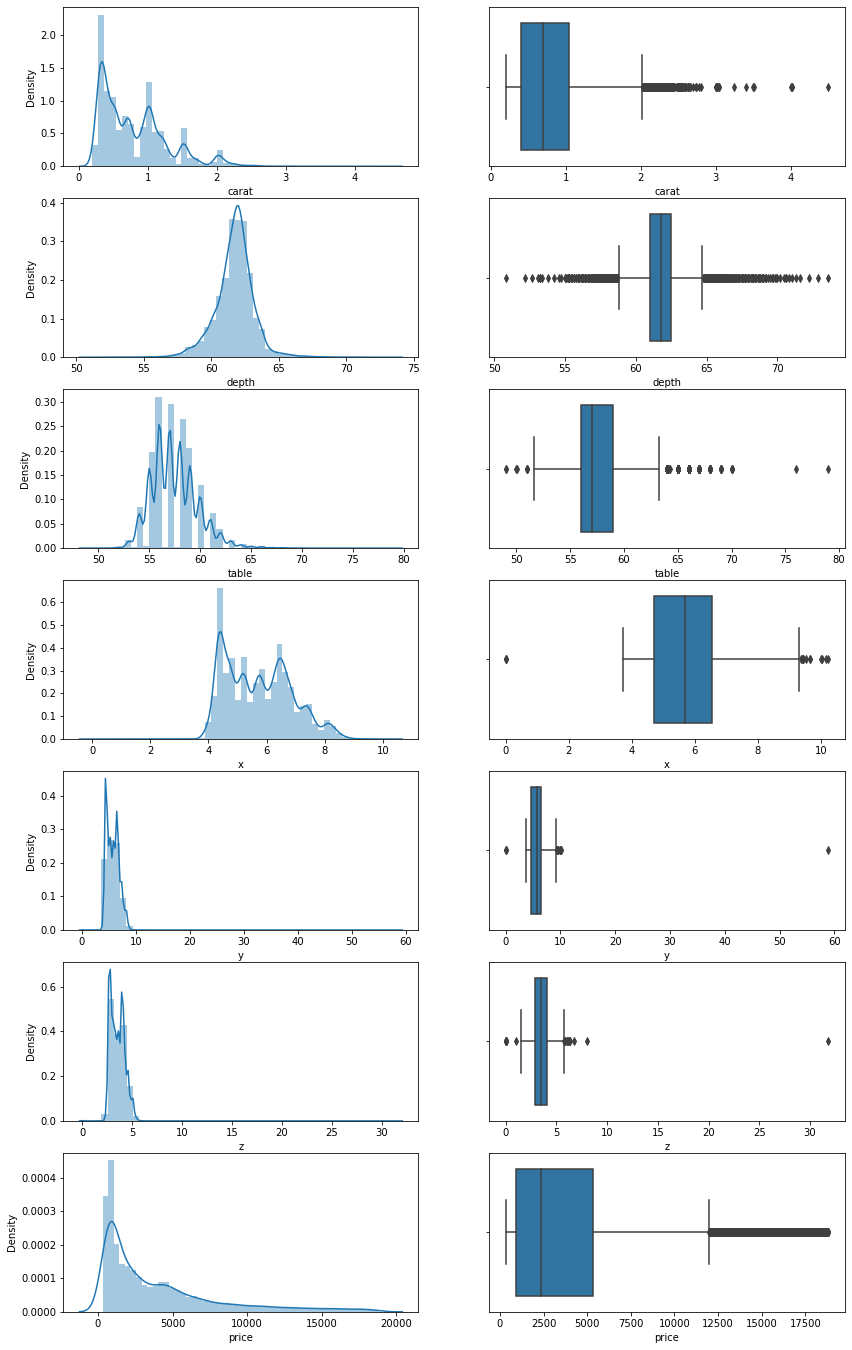

In [80]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(14, 24)
j=0

for i in data_cubic_temp.columns:
    a = sns.distplot(data_cubic_temp[i], ax=axes[j][0])
    a = sns.boxplot(data_cubic_temp[i] , orient = "h" , ax=axes[j][1])
    j=j+1
    
plt.show()

Percentage of Outliers:

In [12]:
Q1 = data_cubic_temp.quantile(0.25)

Q3 = data_cubic_temp.quantile(0.75)

IQR = Q3 - Q1

pd.DataFrame((((data_cubic_temp < (Q1 - 1.5 * IQR)) | (data_cubic_temp > (Q3 + 1.5 * IQR))).sum()/data_cubic_temp.shape[0]*100),
columns = ['Outlier %'],index=None).round(2)

,Outlier %
carat,2.45
depth,4.54
table,1.18
x,0.06
y,0.06
z,0.09
price,6.60


<b> Multi-Variate Analysis

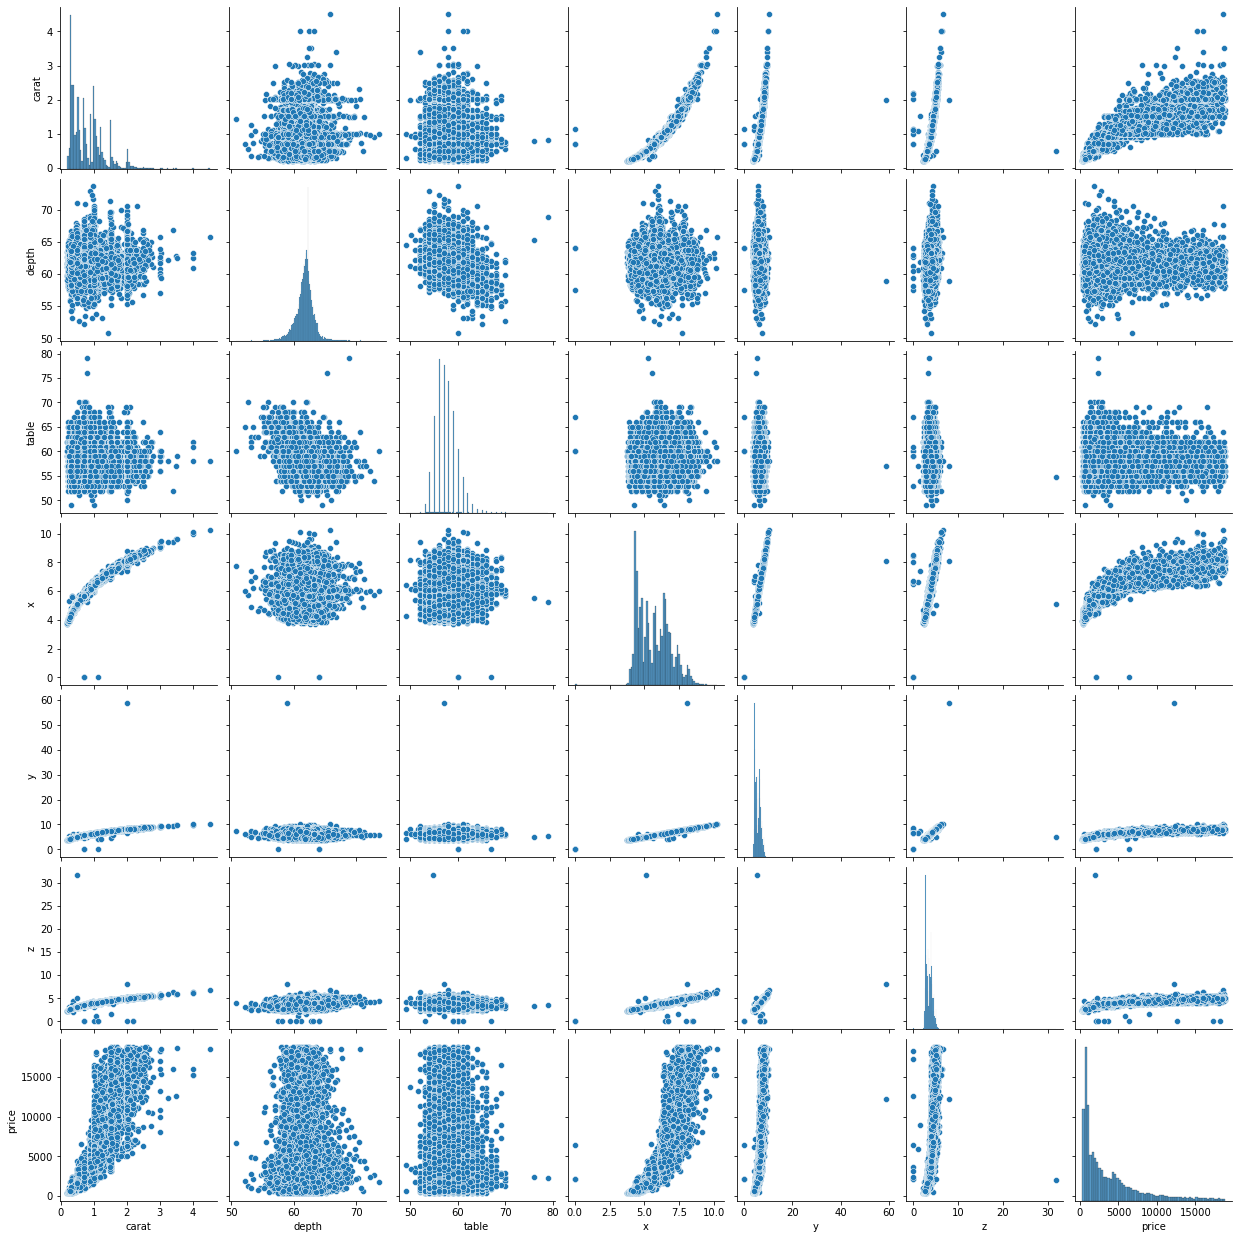

In [13]:
sns.pairplot(data_cubic_temp)
plt.show()

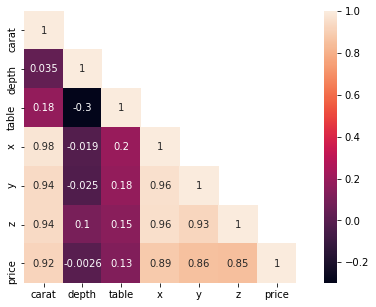

In [14]:
cor = data_cubic_temp.corr()
mask = np.array(cor) 
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots() 
fig.set_size_inches(10,5) 
sns.heatmap(cor, mask=mask, vmax=1, square=True,annot=True)
plt.show()

<b>1.2

<b>Replace Null Values:

In [15]:
data_cubic.depth = data_cubic.depth.fillna(data_cubic.depth.median())

<b>Checking for 0 values:

In [16]:
for column in data_cubic.columns: 
    print(str(column)+"="+str((data_cubic[column] == 0).sum()))

carat=0
cut=0
color=0
clarity=0
depth=0
table=0
x=3
y=3
z=9
price=0


In [17]:
data_cubic = data_cubic[(data_cubic != 0).all(1)]

<b> Yes Scaling is Necessary

<b> 1.3

In [18]:
data_cubic

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [19]:
data_cubic = pd.get_dummies(data_cubic, columns=['cut'])

In [20]:
data_cubic = pd.get_dummies(data_cubic, columns=['color'])

In [21]:
data_cubic = pd.get_dummies(data_cubic, columns=['clarity'])

In [22]:
data_cubic

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X = data_cubic.drop('price', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = data_cubic[['price']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

<b> Scaling:

In [26]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [27]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [28]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.387327442917127
The coefficient for depth is -0.026963804385397715
The coefficient for table is -0.015768069986261925
The coefficient for x is -0.32919907915535945
The coefficient for y is -0.000567191852411579
The coefficient for z is -0.008678885230376384
The coefficient for cut_Fair is -0.027983535486906703
The coefficient for cut_Good is -0.010154976947744447
The coefficient for cut_Ideal is 0.011966161081916917
The coefficient for cut_Premium is 0.003290597179819843
The coefficient for cut_Very Good is 0.0007293711951978562
The coefficient for color_D is 0.05201031544271606
The coefficient for color_E is 0.04167776937797669
The coefficient for color_F is 0.035248688416608824
The coefficient for color_G is 0.015851001868550412
The coefficient for color_H is -0.0322141587680979
The coefficient for color_I is -0.0658165629392468
The coefficient for color_J is -0.09605297143234316
The coefficient for clarity_I1 is -0.11241632963581774
The coefficient for

<b> R Squared - 

In [29]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9229821106785613

In [30]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9173142000335776

<b> RMSE - 

In [31]:
mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)
import math
math.sqrt(mse)

0.2775209709579416

In [32]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)
import math
math.sqrt(mse)

0.28755138665362523

<b> Inference - 

- Univariate/Bivariate - Anaysis
- Most Imp Features
- How to have better profit share/predicitng price

<h2> 
    <center> Problem 2: Logistic Regression and LDA
    </center>
</h2>

<b>2.1 

<b>Data Ingestion:

In [33]:
data_tour = pd.read_csv("Holiday_Package.csv")

<b>Data Description:

In [34]:
data_tour.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [35]:
data_tour.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [36]:
data_tour.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [37]:
data_tour.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [38]:
row, col = data_tour.shape

In [39]:
print("The dataset has "+str(row)+" rows and "+str(col)+" columns")

The dataset has 872 rows and 8 columns


In [40]:
data_tour = data_tour.drop(["Unnamed: 0"], axis = 1)

<b> Univariate Analysis:

Box Plot & Distribution Plot:

In [41]:
data_tour_temp = data_tour.drop(["Holliday_Package","foreign"], axis = 1)

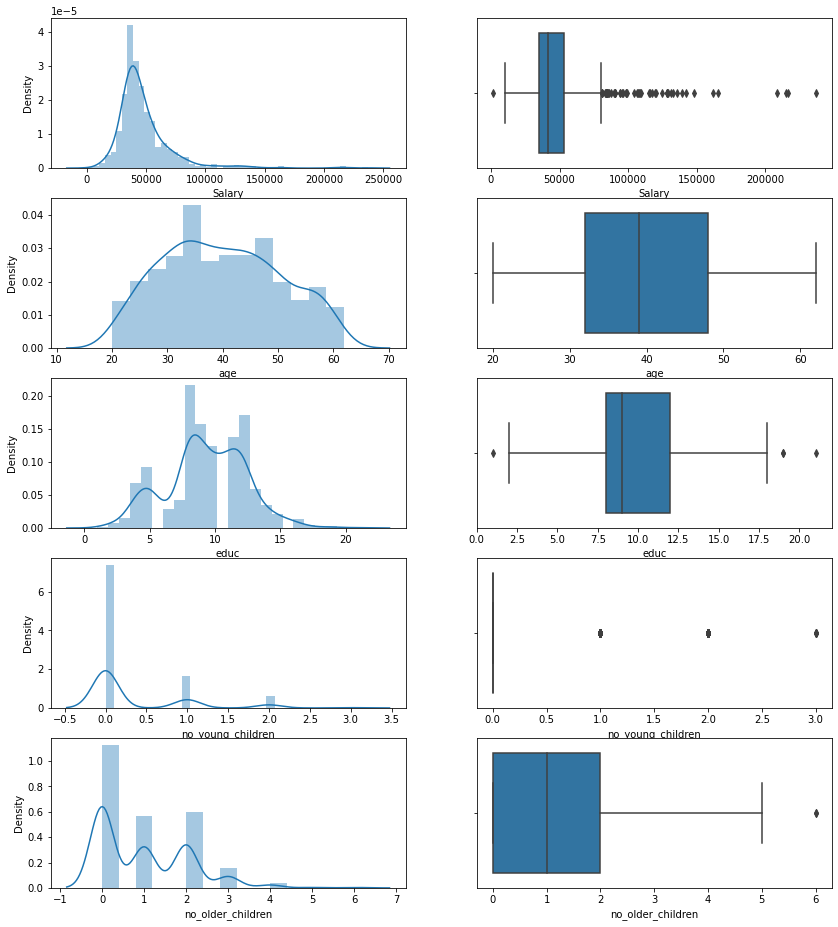

In [42]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14, 16)
j=0

for i in data_tour_temp.columns:
    a = sns.distplot(data_tour_temp[i], ax=axes[j][0])
    a = sns.boxplot(data_tour_temp[i] , orient = "h" , ax=axes[j][1])
    j=j+1
    
plt.show()

Percentage of Outliers:

In [43]:
Q1 = data_tour_temp.quantile(0.25)

Q3 = data_tour_temp.quantile(0.75)

IQR = Q3 - Q1

pd.DataFrame((((data_tour_temp < (Q1 - 1.5 * IQR)) | (data_tour_temp > (Q3 + 1.5 * IQR))).sum()/data_tour_temp.shape[0]*100),
columns = ['Outlier %'],index=None).round(2)

,Outlier %
Salary,6.54
age,0.00
educ,0.46
no_young_children,23.74
no_older_children,0.23


<b> Multi-Variate Analysis

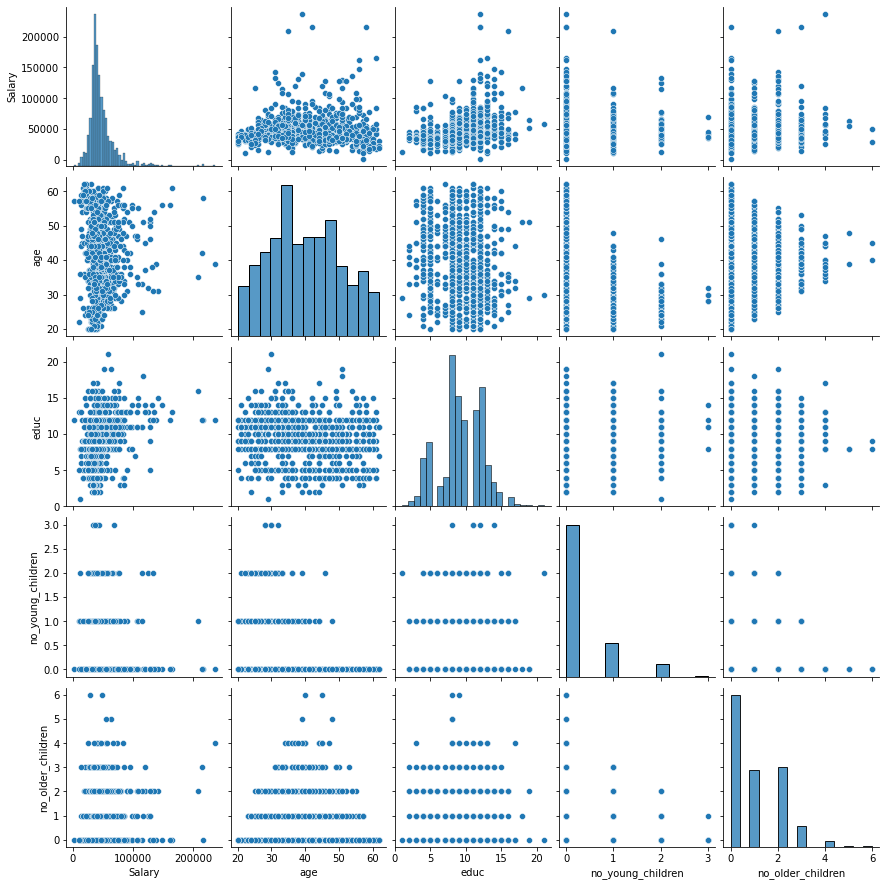

In [44]:
sns.pairplot(data_tour_temp)
plt.show()

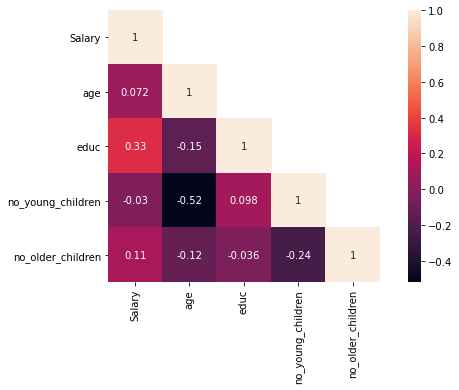

In [45]:
cor = data_tour_temp.corr()
mask = np.array(cor) 
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots() 
fig.set_size_inches(10,5) 
sns.heatmap(cor, mask=mask, vmax=1, square=True,annot=True)
plt.show()

<b> 2.2 & 2.3

Encoding Columns:

In [46]:
data_tour

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [47]:
data_tour['Holliday_Package'].unique()

array(['no', 'yes'], dtype=object)

In [48]:
data_tour['foreign'].unique()

array(['no', 'yes'], dtype=object)

In [49]:
data_tour['Holliday_Package']=np.where(data_tour['Holliday_Package'] =='no', '0', data_tour['Holliday_Package'])
data_tour['Holliday_Package']=np.where(data_tour['Holliday_Package'] =='yes', '1', data_tour['Holliday_Package'])

In [50]:
data_tour['foreign']=np.where(data_tour['foreign'] =='no', '0', data_tour['foreign'])
data_tour['foreign']=np.where(data_tour['foreign'] =='yes', '1', data_tour['foreign'])

In [51]:
data_tour

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


<b>Logistic Regression:

In [52]:
X = data_tour.drop('Holliday_Package', axis=1)

In [53]:
Y = data_tour[["Holliday_Package"]]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

<b>Training Metrics:

Accuracy:

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

0.519672131147541

Confusion Matrix:

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_predict_train)

array([[294,  32],
       [261,  23]], dtype=int64)

ROC Curve:

In [58]:
from sklearn import metrics

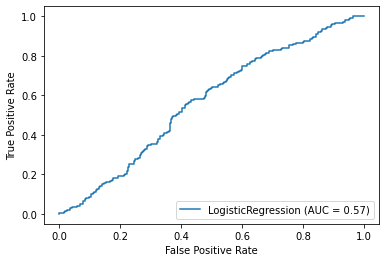

In [59]:
metrics.plot_roc_curve(model, X_train, y_train)

ROC_AUC score:

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.5668258014343731

<b>Test Metrics:

Accuracy:

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_test)

0.5305343511450382

Confusion Matrix:

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict_test)

array([[129,  16],
       [107,  10]], dtype=int64)

ROC Curve:

In [63]:
from sklearn import metrics

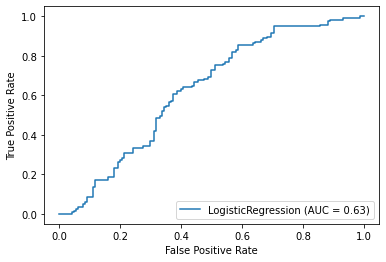

In [64]:
metrics.plot_roc_curve(model, X_test, y_test)

ROC_AUC score:

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.6266430887120542

<b> Linear Discriminant Analysis:

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train, y_train)

In [67]:
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

<b>Training Metrics:

Accuracy:

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

0.6721311475409836

Confusion Matrix:

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_predict_train)

array([[252,  74],
       [126, 158]], dtype=int64)

ROC Curve:

In [70]:
from sklearn import metrics

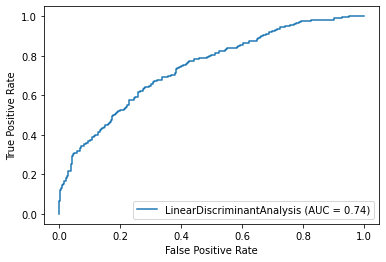

In [71]:
metrics.plot_roc_curve(model, X_train, y_train)

ROC_AUC score:

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.7421152682968979

<b>Test Metrics:

Accuracy:

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_test)

0.6412213740458015

Confusion Matrix:

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict_test)

array([[103,  42],
       [ 52,  65]], dtype=int64)

ROC Curve:

In [75]:
from sklearn import metrics

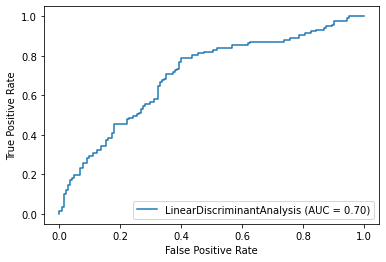

In [76]:
metrics.plot_roc_curve(model, X_test, y_test)

ROC_AUC score:

In [77]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.7029177718832891

Feature Importance:

In [78]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Salary is -1.4754954809881397e-05
The coefficient for age is -0.05430378306113369
The coefficient for educ is 0.07596537387390198
The coefficient for no_young_children is -1.4285464350098698
The coefficient for no_older_children is -0.04635929801474014
The coefficient for foreign is 1.6239034671206722
